Subsequently, we can get distances between the 4 Cluster satellites by first getting the altitude of each cluster satellites and then by calculating the distances through 3D pithagoras utilizing x, y, and z coordinates previously extrapolated

In [1]:
import speasy as spz
import numpy as np
from numpy import sqrt
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt

In [2]:
csa_tree = spz.inventories.data_tree.csa
start_time = dt.datetime(2010,1,1,1,0)
end_time = dt.datetime(2012,1,1,1,0)

In [3]:
parameters = list(spz.inventories.flat_inventories.csa.parameters.keys())

In [4]:
[param for param in parameters if "C1_CP_FGM" in param]

['C1_CP_FGM_SPIN/B_vec_xyz_gse__C1_CP_FGM_SPIN',
 'C1_CP_FGM_SPIN/B_mag__C1_CP_FGM_SPIN',
 'C1_CP_FGM_SPIN/sc_pos_xyz_gse__C1_CP_FGM_SPIN',
 'C1_CP_FGM_SPIN_ISR2/B_mag__C1_CP_FGM_SPIN_ISR2',
 'C1_CP_FGM_SPIN_ISR2/B_vec_xyz_isr2__C1_CP_FGM_SPIN_ISR2',
 'C1_CP_FGM_SPIN_ISR2/sc_pos_xyz_isr2__C1_CP_FGM_SPIN_ISR2',
 'C1_CP_FGM_FULL/B_vec_xyz_gse__C1_CP_FGM_FULL',
 'C1_CP_FGM_FULL/B_mag__C1_CP_FGM_FULL',
 'C1_CP_FGM_FULL/sc_pos_xyz_gse__C1_CP_FGM_FULL',
 'C1_CP_FGM_FULL_ISR2/B_mag__C1_CP_FGM_FULL_ISR2',
 'C1_CP_FGM_FULL_ISR2/B_vec_xyz_isr2__C1_CP_FGM_FULL_ISR2',
 'C1_CP_FGM_FULL_ISR2/sc_pos_xyz_isr2__C1_CP_FGM_FULL_ISR2',
 'C1_CP_FGM_5VPS/B_vec_xyz_gse__C1_CP_FGM_5VPS',
 'C1_CP_FGM_5VPS/B_mag__C1_CP_FGM_5VPS',
 'C1_CP_FGM_5VPS/sc_pos_xyz_gse__C1_CP_FGM_5VPS',
 'C1_CP_FGM_5VPS_ISR2/B_mag__C1_CP_FGM_5VPS_ISR2',
 'C1_CP_FGM_5VPS_ISR2/B_vec_xyz_isr2__C1_CP_FGM_5VPS_ISR2',
 'C1_CP_FGM_5VPS_ISR2/sc_pos_xyz_isr2__C1_CP_FGM_5VPS_ISR2']

In [5]:
mag_products1 = [
    csa_tree.Cluster.Cluster_1.FGM1.C1_CP_FGM_SPIN.B_vec_xyz_gse__C1_CP_FGM_SPIN,
    csa_tree.Cluster.Cluster_1.FGM1.C1_CP_FGM_SPIN.sc_pos_xyz_gse__C1_CP_FGM_SPIN
]
pos_prod1 = [csa_tree.Cluster.Cluster_1.FGM1.C1_CP_FGM_SPIN.sc_pos_xyz_gse__C1_CP_FGM_SPIN]
mag_data1 = spz.get_data(mag_products1, start_time, end_time)
pos_data1 = spz.get_data(pos_prod1, start_time, end_time)
print(mag_products1)
print(pos_prod1)

[<ParameterIndex: B_vec_xyz_gse__C1_CP_FGM_SPIN>, <ParameterIndex: sc_pos_xyz_gse__C1_CP_FGM_SPIN>]
[<ParameterIndex: sc_pos_xyz_gse__C1_CP_FGM_SPIN>]


In [6]:
position_gse1 = pos_data1[0].to_dataframe()

In [7]:
position_gse1


,x,y,z
2010-01-01 01:00:02.876,57241.101562,62513.601562,-59393.000000
2010-01-01 01:00:07.075,57240.500000,62507.800781,-59390.699219
2010-01-01 01:00:11.273,57239.898438,62502.000000,-59388.398438
2010-01-01 01:00:15.472,57239.300781,62496.101562,-59386.101562
2010-01-01 01:00:19.670,57238.699219,62490.300781,-59383.800781
...,...,...,...
2012-01-01 00:59:39.543,57777.601562,95939.703125,-68664.796875
2012-01-01 00:59:43.760,57779.500000,95937.898438,-68662.796875
2012-01-01 00:59:47.978,57781.398438,95936.101562,-68660.703125
2012-01-01 00:59:52.195,57783.300781,95934.296875,-68658.703125


In [8]:
[param for param in parameters if "C2_CP_FGM" in param]

['C2_CP_FGM_5VPS_ISR2/B_mag__C2_CP_FGM_5VPS_ISR2',
 'C2_CP_FGM_5VPS_ISR2/B_vec_xyz_isr2__C2_CP_FGM_5VPS_ISR2',
 'C2_CP_FGM_5VPS_ISR2/sc_pos_xyz_isr2__C2_CP_FGM_5VPS_ISR2',
 'C2_CP_FGM_5VPS/B_vec_xyz_gse__C2_CP_FGM_5VPS',
 'C2_CP_FGM_5VPS/B_mag__C2_CP_FGM_5VPS',
 'C2_CP_FGM_5VPS/sc_pos_xyz_gse__C2_CP_FGM_5VPS',
 'C2_CP_FGM_FULL_ISR2/B_mag__C2_CP_FGM_FULL_ISR2',
 'C2_CP_FGM_FULL_ISR2/B_vec_xyz_isr2__C2_CP_FGM_FULL_ISR2',
 'C2_CP_FGM_FULL_ISR2/sc_pos_xyz_isr2__C2_CP_FGM_FULL_ISR2',
 'C2_CP_FGM_FULL/B_vec_xyz_gse__C2_CP_FGM_FULL',
 'C2_CP_FGM_FULL/B_mag__C2_CP_FGM_FULL',
 'C2_CP_FGM_FULL/sc_pos_xyz_gse__C2_CP_FGM_FULL',
 'C2_CP_FGM_SPIN_ISR2/B_mag__C2_CP_FGM_SPIN_ISR2',
 'C2_CP_FGM_SPIN_ISR2/B_vec_xyz_isr2__C2_CP_FGM_SPIN_ISR2',
 'C2_CP_FGM_SPIN_ISR2/sc_pos_xyz_isr2__C2_CP_FGM_SPIN_ISR2',
 'C2_CP_FGM_SPIN/B_vec_xyz_gse__C2_CP_FGM_SPIN',
 'C2_CP_FGM_SPIN/B_mag__C2_CP_FGM_SPIN',
 'C2_CP_FGM_SPIN/sc_pos_xyz_gse__C2_CP_FGM_SPIN']

In [9]:
mag_products2 = [
    csa_tree.Cluster.Cluster_2.FGM2.C2_CP_FGM_SPIN.B_vec_xyz_gse__C2_CP_FGM_SPIN,
    csa_tree.Cluster.Cluster_2.FGM2.C2_CP_FGM_SPIN.sc_pos_xyz_gse__C2_CP_FGM_SPIN
]
pos_prod2 = [csa_tree.Cluster.Cluster_2.FGM2.C2_CP_FGM_SPIN.sc_pos_xyz_gse__C2_CP_FGM_SPIN]
mag_data2 = spz.get_data(mag_products2, start_time, end_time)
pos_data2 = spz.get_data(pos_prod2, start_time, end_time)
print(mag_products2)
print(pos_prod2)

[<ParameterIndex: B_vec_xyz_gse__C2_CP_FGM_SPIN>, <ParameterIndex: sc_pos_xyz_gse__C2_CP_FGM_SPIN>]
[<ParameterIndex: sc_pos_xyz_gse__C2_CP_FGM_SPIN>]


In [10]:
position_gse2 = pos_data2[0].to_dataframe()

In [11]:
position_gse2

,x,y,z
2010-01-01 01:00:02.525,56496.699219,64543.199219,-59953.199219
2010-01-01 01:00:06.664,56495.601562,64537.398438,-59951.500000
2010-01-01 01:00:10.803,56494.500000,64531.699219,-59949.800781
2010-01-01 01:00:14.943,56493.398438,64525.898438,-59948.101562
2010-01-01 01:00:19.082,56492.300781,64520.199219,-59946.398438
...,...,...,...
2012-01-01 00:59:42.771,56948.699219,96779.898438,-74504.203125
2012-01-01 00:59:46.907,56950.300781,96778.203125,-74502.500000
2012-01-01 00:59:51.043,56951.800781,96776.601562,-74500.898438
2012-01-01 00:59:55.179,56953.398438,96775.000000,-74499.203125


In [12]:
[param for param in parameters if "C3_CP_FGM" in param]

['C3_CP_FGM_5VPS_ISR2/B_mag__C3_CP_FGM_5VPS_ISR2',
 'C3_CP_FGM_5VPS_ISR2/B_vec_xyz_isr2__C3_CP_FGM_5VPS_ISR2',
 'C3_CP_FGM_5VPS_ISR2/sc_pos_xyz_isr2__C3_CP_FGM_5VPS_ISR2',
 'C3_CP_FGM_5VPS/B_vec_xyz_gse__C3_CP_FGM_5VPS',
 'C3_CP_FGM_5VPS/B_mag__C3_CP_FGM_5VPS',
 'C3_CP_FGM_5VPS/sc_pos_xyz_gse__C3_CP_FGM_5VPS',
 'C3_CP_FGM_FULL_ISR2/B_mag__C3_CP_FGM_FULL_ISR2',
 'C3_CP_FGM_FULL_ISR2/B_vec_xyz_isr2__C3_CP_FGM_FULL_ISR2',
 'C3_CP_FGM_FULL_ISR2/sc_pos_xyz_isr2__C3_CP_FGM_FULL_ISR2',
 'C3_CP_FGM_FULL/B_vec_xyz_gse__C3_CP_FGM_FULL',
 'C3_CP_FGM_FULL/B_mag__C3_CP_FGM_FULL',
 'C3_CP_FGM_FULL/sc_pos_xyz_gse__C3_CP_FGM_FULL',
 'C3_CP_FGM_SPIN_ISR2/B_mag__C3_CP_FGM_SPIN_ISR2',
 'C3_CP_FGM_SPIN_ISR2/B_vec_xyz_isr2__C3_CP_FGM_SPIN_ISR2',
 'C3_CP_FGM_SPIN_ISR2/sc_pos_xyz_isr2__C3_CP_FGM_SPIN_ISR2',
 'C3_CP_FGM_SPIN/B_vec_xyz_gse__C3_CP_FGM_SPIN',
 'C3_CP_FGM_SPIN/B_mag__C3_CP_FGM_SPIN',
 'C3_CP_FGM_SPIN/sc_pos_xyz_gse__C3_CP_FGM_SPIN']

In [13]:
mag_products3 = [
    csa_tree.Cluster.Cluster_3.FGM3.C3_CP_FGM_SPIN.B_vec_xyz_gse__C3_CP_FGM_SPIN,
    csa_tree.Cluster.Cluster_3.FGM3.C3_CP_FGM_SPIN.sc_pos_xyz_gse__C3_CP_FGM_SPIN
]
pos_prod3 = [csa_tree.Cluster.Cluster_3.FGM3.C3_CP_FGM_SPIN.sc_pos_xyz_gse__C3_CP_FGM_SPIN]
mag_data3 = spz.get_data(mag_products3, start_time, end_time)
pos_data3 = spz.get_data(pos_prod3, start_time, end_time)

In [14]:
position_gse3 = pos_data3[0].to_dataframe()

In [15]:
position_gse3

,x,y,z
2010-01-01 01:00:01.045,58074.601562,61465.398438,-61952.300781
2010-01-01 01:00:05.215,58073.800781,61459.800781,-61950.000000
2010-01-01 01:00:09.386,58072.898438,61454.199219,-61947.601562
2010-01-01 01:00:13.556,58072.101562,61448.601562,-61945.300781
2010-01-01 01:00:17.726,58071.300781,61443.000000,-61943.000000
...,...,...,...
2012-01-01 00:59:39.450,59675.898438,93492.500000,-71765.601562
2012-01-01 00:59:43.634,59677.601562,93490.898438,-71763.500000
2012-01-01 00:59:47.818,59679.398438,93489.203125,-71761.398438
2012-01-01 00:59:52.002,59681.101562,93487.601562,-71759.296875


In [16]:
[param for param in parameters if "C4_CP_FGM" in param]

['C4_CP_FGM_5VPS_ISR2/B_mag__C4_CP_FGM_5VPS_ISR2',
 'C4_CP_FGM_5VPS_ISR2/B_vec_xyz_isr2__C4_CP_FGM_5VPS_ISR2',
 'C4_CP_FGM_5VPS_ISR2/sc_pos_xyz_isr2__C4_CP_FGM_5VPS_ISR2',
 'C4_CP_FGM_5VPS/B_vec_xyz_gse__C4_CP_FGM_5VPS',
 'C4_CP_FGM_5VPS/B_mag__C4_CP_FGM_5VPS',
 'C4_CP_FGM_5VPS/sc_pos_xyz_gse__C4_CP_FGM_5VPS',
 'C4_CP_FGM_FULL_ISR2/B_mag__C4_CP_FGM_FULL_ISR2',
 'C4_CP_FGM_FULL_ISR2/B_vec_xyz_isr2__C4_CP_FGM_FULL_ISR2',
 'C4_CP_FGM_FULL_ISR2/sc_pos_xyz_isr2__C4_CP_FGM_FULL_ISR2',
 'C4_CP_FGM_FULL/B_vec_xyz_gse__C4_CP_FGM_FULL',
 'C4_CP_FGM_FULL/B_mag__C4_CP_FGM_FULL',
 'C4_CP_FGM_FULL/sc_pos_xyz_gse__C4_CP_FGM_FULL',
 'C4_CP_FGM_SPIN_ISR2/B_mag__C4_CP_FGM_SPIN_ISR2',
 'C4_CP_FGM_SPIN_ISR2/B_vec_xyz_isr2__C4_CP_FGM_SPIN_ISR2',
 'C4_CP_FGM_SPIN_ISR2/sc_pos_xyz_isr2__C4_CP_FGM_SPIN_ISR2',
 'C4_CP_FGM_SPIN/B_vec_xyz_gse__C4_CP_FGM_SPIN',
 'C4_CP_FGM_SPIN/B_mag__C4_CP_FGM_SPIN',
 'C4_CP_FGM_SPIN/sc_pos_xyz_gse__C4_CP_FGM_SPIN']

In [17]:
mag_products4 = [
    csa_tree.Cluster.Cluster_4.FGM4.C4_CP_FGM_SPIN.B_vec_xyz_gse__C4_CP_FGM_SPIN,
    csa_tree.Cluster.Cluster_4.FGM4.C4_CP_FGM_SPIN.sc_pos_xyz_gse__C4_CP_FGM_SPIN
]


In [18]:
pos_prod4 = [csa_tree.Cluster.Cluster_4.FGM4.C4_CP_FGM_SPIN.sc_pos_xyz_gse__C4_CP_FGM_SPIN]

In [20]:
pos_data4 = spz.get_data(pos_prod4, start_time, end_time)

In [21]:
position_gse4 = pos_data4[0].to_dataframe()

In [22]:
position_gse4

,x,y,z
2010-01-01 01:00:03.664,58090.898438,61086.199219,-61870.500000
2010-01-01 01:00:07.775,58090.000000,61080.601562,-61868.199219
2010-01-01 01:00:11.886,58089.199219,61075.101562,-61865.898438
2010-01-01 01:00:15.998,58088.300781,61069.601562,-61863.601562
2010-01-01 01:00:20.109,58087.500000,61064.000000,-61861.300781
...,...,...,...
2012-01-01 00:59:42.245,59668.398438,93462.398438,-71787.500000
2012-01-01 00:59:46.363,59670.101562,93460.796875,-71785.500000
2012-01-01 00:59:50.482,59671.800781,93459.203125,-71783.398438
2012-01-01 00:59:54.600,59673.500000,93457.601562,-71781.296875


In [23]:
x1 = position_gse1.get(['x'])

x1

,x
2010-01-01 01:00:02.876,57241.101562
2010-01-01 01:00:07.075,57240.500000
2010-01-01 01:00:11.273,57239.898438
2010-01-01 01:00:15.472,57239.300781
2010-01-01 01:00:19.670,57238.699219
...,...
2012-01-01 00:59:39.543,57777.601562
2012-01-01 00:59:43.760,57779.500000
2012-01-01 00:59:47.978,57781.398438
2012-01-01 00:59:52.195,57783.300781


In [24]:
x2 = position_gse2.get(['x'])
nx2 = x2[:13297602]
x2

,x
2010-01-01 01:00:02.525,56496.699219
2010-01-01 01:00:06.664,56495.601562
2010-01-01 01:00:10.803,56494.500000
2010-01-01 01:00:14.943,56493.398438
2010-01-01 01:00:19.082,56492.300781
...,...
2012-01-01 00:59:42.771,56948.699219
2012-01-01 00:59:46.907,56950.300781
2012-01-01 00:59:51.043,56951.800781
2012-01-01 00:59:55.179,56953.398438


In [25]:
x3 = position_gse3.get(['x'])
nx3 = x3[:13297602]
x3

,x
2010-01-01 01:00:01.045,58074.601562
2010-01-01 01:00:05.215,58073.800781
2010-01-01 01:00:09.386,58072.898438
2010-01-01 01:00:13.556,58072.101562
2010-01-01 01:00:17.726,58071.300781
...,...
2012-01-01 00:59:39.450,59675.898438
2012-01-01 00:59:43.634,59677.601562
2012-01-01 00:59:47.818,59679.398438
2012-01-01 00:59:52.002,59681.101562


In [26]:
x4 = position_gse4.get(['x'])
nx4 = x4[:13297602]
x4

,x
2010-01-01 01:00:03.664,58090.898438
2010-01-01 01:00:07.775,58090.000000
2010-01-01 01:00:11.886,58089.199219
2010-01-01 01:00:15.998,58088.300781
2010-01-01 01:00:20.109,58087.500000
...,...
2012-01-01 00:59:42.245,59668.398438
2012-01-01 00:59:46.363,59670.101562
2012-01-01 00:59:50.482,59671.800781
2012-01-01 00:59:54.600,59673.500000


In [27]:
y1 = position_gse1.get(['y'])
y1

,y
2010-01-01 01:00:02.876,62513.601562
2010-01-01 01:00:07.075,62507.800781
2010-01-01 01:00:11.273,62502.000000
2010-01-01 01:00:15.472,62496.101562
2010-01-01 01:00:19.670,62490.300781
...,...
2012-01-01 00:59:39.543,95939.703125
2012-01-01 00:59:43.760,95937.898438
2012-01-01 00:59:47.978,95936.101562
2012-01-01 00:59:52.195,95934.296875


In [28]:
y2 = position_gse2.get(['y'])
ny2 = y2[:13297602]
y2

,y
2010-01-01 01:00:02.525,64543.199219
2010-01-01 01:00:06.664,64537.398438
2010-01-01 01:00:10.803,64531.699219
2010-01-01 01:00:14.943,64525.898438
2010-01-01 01:00:19.082,64520.199219
...,...
2012-01-01 00:59:42.771,96779.898438
2012-01-01 00:59:46.907,96778.203125
2012-01-01 00:59:51.043,96776.601562
2012-01-01 00:59:55.179,96775.000000


In [29]:
y3 = position_gse3.get(['y'])
ny3 = y3[:13297602]
y3

,y
2010-01-01 01:00:01.045,61465.398438
2010-01-01 01:00:05.215,61459.800781
2010-01-01 01:00:09.386,61454.199219
2010-01-01 01:00:13.556,61448.601562
2010-01-01 01:00:17.726,61443.000000
...,...
2012-01-01 00:59:39.450,93492.500000
2012-01-01 00:59:43.634,93490.898438
2012-01-01 00:59:47.818,93489.203125
2012-01-01 00:59:52.002,93487.601562


In [30]:
y4 = position_gse4.get(['y'])
ny4 = y4[:13297602]
y4

,y
2010-01-01 01:00:03.664,61086.199219
2010-01-01 01:00:07.775,61080.601562
2010-01-01 01:00:11.886,61075.101562
2010-01-01 01:00:15.998,61069.601562
2010-01-01 01:00:20.109,61064.000000
...,...
2012-01-01 00:59:42.245,93462.398438
2012-01-01 00:59:46.363,93460.796875
2012-01-01 00:59:50.482,93459.203125
2012-01-01 00:59:54.600,93457.601562


In [31]:
z1 = position_gse1.get(['z'])
z1

,z
2010-01-01 01:00:02.876,-59393.000000
2010-01-01 01:00:07.075,-59390.699219
2010-01-01 01:00:11.273,-59388.398438
2010-01-01 01:00:15.472,-59386.101562
2010-01-01 01:00:19.670,-59383.800781
...,...
2012-01-01 00:59:39.543,-68664.796875
2012-01-01 00:59:43.760,-68662.796875
2012-01-01 00:59:47.978,-68660.703125
2012-01-01 00:59:52.195,-68658.703125


In [32]:
z2 = position_gse2.get(['z'])
nz2 = z2[:13297602]
z2

,z
2010-01-01 01:00:02.525,-59953.199219
2010-01-01 01:00:06.664,-59951.500000
2010-01-01 01:00:10.803,-59949.800781
2010-01-01 01:00:14.943,-59948.101562
2010-01-01 01:00:19.082,-59946.398438
...,...
2012-01-01 00:59:42.771,-74504.203125
2012-01-01 00:59:46.907,-74502.500000
2012-01-01 00:59:51.043,-74500.898438
2012-01-01 00:59:55.179,-74499.203125


In [33]:
z3 = position_gse3.get(['z'])
nz3 = z3[:13297602]
z3

,z
2010-01-01 01:00:01.045,-61952.300781
2010-01-01 01:00:05.215,-61950.000000
2010-01-01 01:00:09.386,-61947.601562
2010-01-01 01:00:13.556,-61945.300781
2010-01-01 01:00:17.726,-61943.000000
...,...
2012-01-01 00:59:39.450,-71765.601562
2012-01-01 00:59:43.634,-71763.500000
2012-01-01 00:59:47.818,-71761.398438
2012-01-01 00:59:52.002,-71759.296875


In [34]:
z4 = position_gse4.get(['z'])
nz4 = z4[:13297602]
z4

,z
2010-01-01 01:00:03.664,-61870.500000
2010-01-01 01:00:07.775,-61868.199219
2010-01-01 01:00:11.886,-61865.898438
2010-01-01 01:00:15.998,-61863.601562
2010-01-01 01:00:20.109,-61861.300781
...,...
2012-01-01 00:59:42.245,-71787.500000
2012-01-01 00:59:46.363,-71785.500000
2012-01-01 00:59:50.482,-71783.398438
2012-01-01 00:59:54.600,-71781.296875


In [35]:
d_c1c2 = sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 -z1)**2)
print('d_c1c2 =',d_c1c2)
d_c1c2


d_c1c2 =                           x   y   z
2010-01-01 01:00:02.525 NaN NaN NaN
2010-01-01 01:00:02.876 NaN NaN NaN
2010-01-01 01:00:06.664 NaN NaN NaN
2010-01-01 01:00:07.075 NaN NaN NaN
2010-01-01 01:00:10.803 NaN NaN NaN
...                      ..  ..  ..
2012-01-01 00:59:51.043 NaN NaN NaN
2012-01-01 00:59:52.195 NaN NaN NaN
2012-01-01 00:59:55.179 NaN NaN NaN
2012-01-01 00:59:56.413 NaN NaN NaN
2012-01-01 00:59:59.315 NaN NaN NaN

[27689828 rows x 3 columns]


,x,y,z
2010-01-01 01:00:02.525,NaN,NaN,NaN
2010-01-01 01:00:02.876,NaN,NaN,NaN
2010-01-01 01:00:06.664,NaN,NaN,NaN
2010-01-01 01:00:07.075,NaN,NaN,NaN
2010-01-01 01:00:10.803,NaN,NaN,NaN
...,...,...,...
2012-01-01 00:59:51.043,NaN,NaN,NaN
2012-01-01 00:59:52.195,NaN,NaN,NaN
2012-01-01 00:59:55.179,NaN,NaN,NaN
2012-01-01 00:59:56.413,NaN,NaN,NaN


In [53]:
import pandas as pd
print(type(x1))

x1_ = np.array(x1)
x2_ = np.array(nx2)
x3_ = np.array(nx3)
x4_ = np.array(nx4)
y1_ = np.array(y1)
y2_ = np.array(ny2)
y3_ = np.array(ny3)
y4_ = np.array(ny4)
z1_ = np.array(z1)
z2_ = np.array(nz2)
z3_ = np.array(nz3)
z4_ = np.array(nz4)

time = x1.index.values
print(time)

<class 'pandas.core.frame.DataFrame'>


['2010-01-01T01:00:02.876000000' '2010-01-01T01:00:07.075000000'
 '2010-01-01T01:00:11.273000000' ... '2012-01-01T00:59:47.978000000'
 '2012-01-01T00:59:52.195000000' '2012-01-01T00:59:56.413000000']


In [54]:
square21x = (x2_ - x1_)**2
print(square21x) 
square21y = (y2_ - y1_)**2
print(square21y)
square21z = (z2_ - z1_)**2
print(square21z)
add21 = (square21x)+(square21y)+(square21z)


[[5.54134849e+05]
 [5.54873682e+05]
 [5.55618831e+05]
 ...
 [1.53628085e+10]
 [1.53630573e+10]
 [1.53633304e+10]]
[[4.11926665e+06]
 [4.11926665e+06]
 [4.11967892e+06]
 ...
 [1.13885248e+08]
 [1.13791223e+08]
 [1.13695237e+08]]
[[3.13823165e+05]
 [3.14497516e+05]
 [3.15172592e+05]
 ...
 [1.49467626e+08]
 [1.49523984e+08]
 [1.49585130e+08]]


In [55]:
distance21 = sqrt(add21)
print(time, distance21)

['2010-01-01T01:00:02.876000000' '2010-01-01T01:00:07.075000000'
 '2010-01-01T01:00:11.273000000' ... '2012-01-01T00:59:47.978000000'
 '2012-01-01T00:59:52.195000000' '2012-01-01T00:59:56.413000000'] [[  2233.20949763]
 [  2233.52587733]
 [  2233.93606462]
 ...
 [125004.64522983]
 [125005.48997995]
 [125006.44287263]]


In [56]:
min(distance21)
print(min(distance21))
np.argmin(distance21)
print(time[np.argmin(distance21)])


[1093.62076137]
2011-02-24T08:39:26.116000000


In [57]:
square31x = (x3_ - x1_)**2
print(square31x) 
square31y = (y3_ - y1_)**2
print(square31y)
square31z = (z3_ - z1_)**2
print(square31z)
add31 = (square31x)+(square31y)+(square31z)

[[  694722.25      ]
 [  694390.19203186]
 [  693889.        ]
 ...
 [10768242.25      ]
 [10798463.47906494]
 [10828701.34828186]]
[[1.09872979e+06]
 [1.09830400e+06]
 [1.09788648e+06]
 ...
 [2.31513028e+09]
 [2.31563027e+09]
 [2.31613105e+09]]
[[6.55002049e+06]
 [6.55002049e+06]
 [6.54952064e+06]
 ...
 [1.98906209e+09]
 [1.98937429e+09]
 [1.98968652e+09]]


In [58]:
distance31 = sqrt(add31)
print(distance31)

[[ 2888.5069725 ]
 [ 2888.37578596]
 [ 2888.1302104 ]
 ...
 [65688.35983139]
 [65694.7716593 ]
 [65701.18930804]]


In [59]:
min(distance31)
print(min(distance31))
np.argmin(distance31)
print(time[np.argmin(distance31)])

[917.77286675]
2011-12-18T06:01:50.323000000


In [60]:
square41x = (x4_ - x1_)**2
print(square41x) 
square41y = (y4_ - y1_)**2
print(square41y)
square41z = (z4_ - z1_)**2
print(square41z)
add41 = (square41x)+(square41y)+(square41z)

[[7.22154729e+05]
 [7.21650250e+05]
 [7.21311817e+05]
 ...
 [2.81860421e+08]
 [2.81880621e+08]
 [2.81897410e+08]]
[[2037477.45094299]
 [2036897.61000061]
 [2036039.15093994]
 ...
 [ 484557.38531494]
 [ 486222.93188477]
 [ 487902.25      ]]
[[6.13800625e+06]
 [6.13800625e+06]
 [6.13800625e+06]
 ...
 [1.21187158e+08]
 [1.21213563e+08]
 [1.21239970e+08]]


In [61]:
distance41 = sqrt(add41)
print(distance41)

[[ 2982.89095169]
 [ 2982.70918965]
 [ 2982.50854449]
 ...
 [20088.109346  ]
 [20089.31075363]
 [20090.42764472]]


In [62]:
min(distance41)
print(min(distance41))
np.argmin(distance41)
print(time[np.argmin(distance41)])

[500.16421977]
2010-01-07T03:36:38.979000000


In [63]:
square32x = (x3_ - x2_)**2
print(square32x) 
square32y = (y3_ - y2_)**2
print(square32y)
square32z = (z3_ - z2_)**2
print(square32z)
add32 = (square32x)+(square32y)+(square32z)

[[2.48977581e+06]
 [2.49071277e+06]
 [2.49134163e+06]
 ...
 [1.45601139e+10]
 [1.45592457e+10]
 [1.45584020e+10]]
[[9.47285765e+06]
 [9.47160733e+06]
 [9.47100625e+06]
 ...
 [1.40206045e+09]
 [1.40277959e+09]
 [1.40350652e+09]]
[[3.99640706e+06]
 [3.99400225e+06]
 [3.99120796e+06]
 ...
 [3.22903490e+09]
 [3.22969463e+09]
 [3.23037663e+09]]


In [64]:
distance32 = sqrt(add32)
print(distance32)

[[  3994.87678316]
 [  3994.53656359]
 [  3994.19026075]
 ...
 [138532.33997164]
 [138534.18305269]
 [138536.22316168]]


In [65]:
min(distance32)
print(min(distance32))
np.argmin(distance32)
print(time[np.argmin(distance32)])

[685.36865445]
2010-10-12T13:06:30.586000000


In [66]:
square42x = (x4_ - x2_)**2
print(square42x) 
square42y = (y4_ - y2_)**2
print(square42y)
square42z = (z4_ - z2_)**2
print(square42z)
add42 = (square42x)+(square42y)+(square42z)

[[2.54147115e+06]
 [2.54210638e+06]
 [2.54306560e+06]
 ...
 [1.14828579e+10]
 [1.14829441e+10]
 [1.14830730e+10]]
[[11950849.        ]
 [11949444.63500977]
 [11948067.35719299]
 ...
 [99512626.53375244]
 [99400900.        ]
 [99287212.21313477]]
[[3.67604229e+06]
 [3.67373590e+06]
 [3.67143023e+06]
 ...
 [5.39828013e+08]
 [5.39990847e+08]
 [5.40162783e+08]]


In [67]:
distance42 = sqrt(add42)
print(distance42)

[[  4262.43620889]
 [  4262.07542257]
 [  4261.75588036]
 ...
 [110100.8561873 ]
 [110101.47986642]
 [110102.32986999]]


In [68]:
min(distance42)
print(min(distance42))
np.argmin(distance42)
print(time[np.argmin(distance42)])

[1626.97070054]
2010-01-01T12:51:57.232000000


In [69]:
square43x = (x4_ - x3_)**2
print(square43x) 
square43y = (y4_ - y3_)**2
print(square43y)
square43z = (z4_ - z3_)**2
print(square43z)
add43 = (square43x)+(square43y)+(square43z)

[[2.65588135e+02]
 [2.62414688e+02]
 [2.65715469e+02]
 ...
 [1.82444431e+08]
 [1.82336389e+08]
 [1.82225743e+08]]
[[1.43792048e+05]
 [1.43792048e+05]
 [1.43715033e+05]
 ...
 [2.24862787e+09]
 [2.24900725e+09]
 [2.24938665e+09]]
[[6.69136781e+03]
 [6.69136781e+03]
 [6.67540063e+03]
 ...
 [1.12831487e+09]
 [1.12846944e+09]
 [1.12862402e+09]]


In [70]:
distance43 = sqrt(add43)
print(distance43)

[[  388.26408983]
 [  388.26000309]
 [  388.1444951 ]
 ...
 [59660.59982871]
 [59664.16912631]
 [59667.71674179]]


In [71]:
min(distance43)
print(min(distance43))
np.argmin(distance43)
print(time[np.argmin(distance43)])

[65.05635539]
2010-01-02T10:45:50.534000000


In [72]:
print(distance21.ravel())
distance21_min = np.argsort(distance21.ravel())
print(distance21_min)
for i in distance21_min[:10]:
    print(distance21[i])
    print(time[i])

[  2233.20949763   2233.52587733   2233.93606462 ... 125004.64522983
 125005.48997995 125006.44287263]
[ 7577493  7577492  7577491 ... 10905320 10905319 10905315]
[1093.62076137]
2011-02-24T08:39:26.116000000
[1093.63690694]
2011-02-24T08:39:21.907000000
[1093.68055508]
2011-02-24T08:39:17.698000000
[1093.8049385]
2011-02-24T08:39:30.325000000
[1093.87124742]
2011-02-24T08:39:13.488000000
[1094.13818062]
2011-02-24T08:39:34.534000000
[1094.18876414]
2011-02-24T08:39:09.279000000
[1094.52828176]
2011-02-24T08:39:38.743000000
[1094.63205919]
2011-02-24T08:39:05.070000000
[1095.09854979]
2011-02-24T08:39:00.861000000


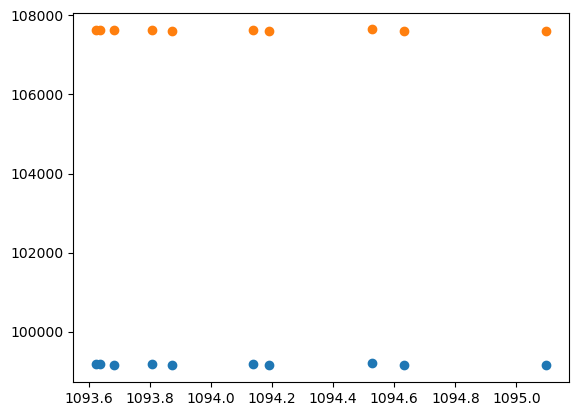

In [73]:
import matplotlib.pyplot as plt

height1 = [99182.094280, 99176.389159, 99170.689476, 99187.861085, 99164.917766, 99193.568373, 99159.272192 , 99199.281839, 99153.498605, 99147.752121]
height2 = [107627.822434, 107622.770215, 107617.795219, 107632.797589, 107612.824681, 107637.771073, 107607.844020, 107642.747817, 107602.871014, 107597.894882]
distance = [1093.62076137, 1093.63690694, 1093.68055508, 1093.8049385, 1093.87124742, 1094.13818062, 1094.18876414, 1094.52828176, 1094.63205919, 1095.09854979]

plt.scatter(distance, height1)
plt.scatter(distance, height2)
plt.show()

In [74]:
print(distance31.ravel())
distance31_min = np.argsort(distance31.ravel())
print(distance31_min)
for i in distance31_min[:10]:
    print(distance31[i])
    print(time[i])

[ 2888.5069725   2888.37578596  2888.1302104  ... 65688.35983139
 65694.7716593  65701.18930804]
[13068849 13068848 13068847 ...  3126439  3126441  3126440]
[917.77286675]
2011-12-18T06:01:50.323000000
[917.84933356]
2011-12-18T06:01:46.106000000
[917.94858279]
2011-12-18T06:01:41.889000000
[918.02630909]
2011-12-18T06:01:37.672000000
[918.23697515]
2011-12-18T06:01:33.455000000
[918.36403544]
2011-12-18T06:01:29.238000000
[918.52998014]
2011-12-18T06:01:25.021000000
[918.54013319]
2011-12-18T06:01:20.804000000
[918.7009822]
2011-12-18T06:01:16.587000000
[918.78527313]
2011-12-18T06:01:12.370000000


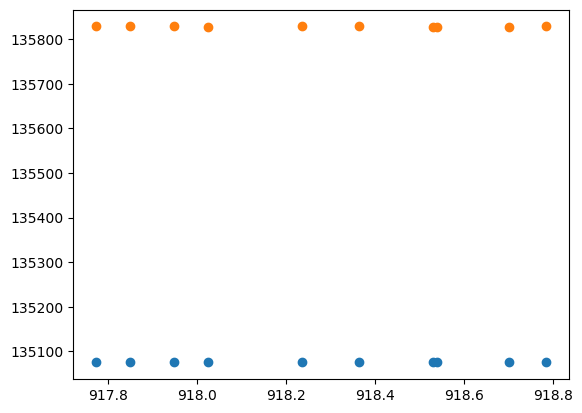

In [75]:
import matplotlib.pyplot as plt
height1 = [135075.259243, 135075.236417, 135075.256273, 135075.233565, 135075.277196, 135075.260942, 135075.238094 , 135075.262964, 135075.240549, 135075.201792]
height3 = [135828.779470, 135828.779470, 135828.822259, 135828.764913, 135828.794011, 135828.775950, 135828.724938, 135828.748029, 135828.766605, 135828.814693]
distance = [917.77286675, 917.84933356, 917.94858279, 918.02630909, 918.23697515, 918.36403544, 918.52998014, 918.54013319, 918.7009822, 918.78527313]

plt.scatter(distance, height1)
plt.scatter(distance, height3)
plt.show()


In [76]:
print(distance41.ravel())
distance41_min = np.argsort(distance41.ravel())
print(distance41_min)
for i in distance41_min[:10]:
    print(distance41[i])
    print(time[i])

[ 2982.89095169  2982.70918965  2982.50854449 ... 20088.109346
 20089.31075363 20090.42764472]
[ 125213  125209  125225 ... 3445770 3445771 3445772]
[500.16421977]
2010-01-07T03:36:38.979000000
[500.16703181]
2010-01-07T03:36:22.185000000
[500.17062872]
2010-01-07T03:37:29.362000000
[500.18428419]
2010-01-07T03:36:30.582000000
[500.18622095]
2010-01-07T03:36:47.376000000
[500.19918741]
2010-01-07T03:37:12.568000000
[500.20228849]
2010-01-07T03:37:04.170000000
[500.20250809]
2010-01-07T03:37:16.766000000
[500.21598102]
2010-01-07T03:36:34.781000000
[500.21730593]
2010-01-07T03:36:09.590000000


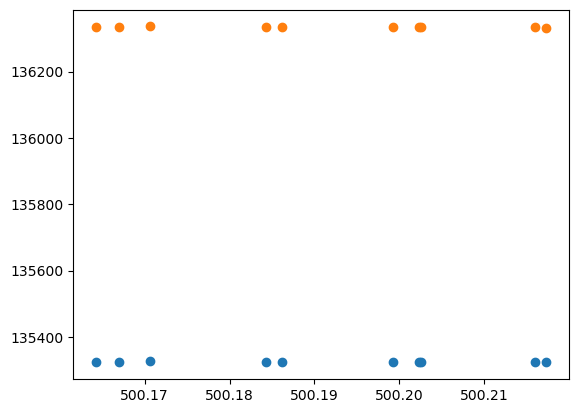

In [77]:
import matplotlib.pyplot as plt
height1 = [135323.912861, 135323.230960, 135325.970970, 135323.551384, 135324.233746, 135325.360547, 135324.958684, 135325.463728, 135323.728224, 135322.683232]
height4 = [136333.862608, 136333.137958, 136335.975441, 136333.504484, 136334.271836, 136335.324509, 136334.965600, 136335.482874, 136333.704677, 136332.533289]
distance = [500.16421977, 500.16703181, 500.17062872, 500.18428419, 500.18622095, 500.19918741, 500.20228849, 500.20250809, 500.21598102, 500.21730593]

plt.scatter(distance, height1)
plt.scatter(distance, height4)
plt.show()

In [78]:
print(distance32.ravel())
distance32_min = np.argsort(distance32.ravel())
print(distance32_min)
for i in distance32_min[:10]:
    print(distance32[i])
    print(time[i])

[  3994.87678316   3994.53656359   3994.19026075 ... 138532.33997164
 138534.18305269 138536.22316168]
[ 5206233  5206234  5206235 ... 11577557 11577556 11577561]
[685.36865445]
2010-10-12T13:06:30.586000000
[685.42622153]
2010-10-12T13:06:34.792000000
[685.43648161]
2010-10-12T13:06:38.997000000
[685.50886431]
2010-10-12T13:06:26.381000000
[685.59186635]
2010-10-12T13:06:43.203000000
[685.61723435]
2010-10-12T13:06:22.176000000
[685.81958942]
2010-10-12T13:06:47.408000000
[685.93964464]
2010-10-12T13:06:17.970000000
[686.20097958]
2010-10-12T13:06:51.614000000
[686.25715294]
2010-10-12T13:06:13.764000000


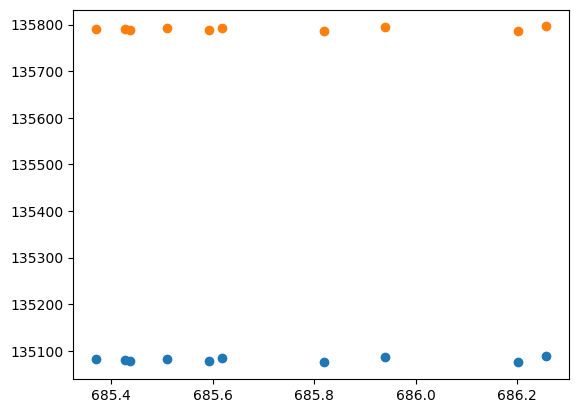

In [79]:
import matplotlib.pyplot as plt
height2 = [135082.033031, 135080.615786, 135079.217802, 135083.331854, 135077.854450, 135084.802047, 135076.460569, 135087.518374, 135075.089880, 135088.864325]
height3 = [135790.828489, 135789.799734, 135788.765792, 135791.862523, 135787.669108, 135792.881169, 135786.635260, 135794.949465, 135785.552443, 135795.978450]
distance = [685.36865445, 685.42622153, 685.43648161, 685.50886431, 685.59186635, 685.61723435, 685.81958942, 685.93964464, 686.20097958, 686.25715294]
plt.scatter(distance, height2)
plt.scatter(distance, height3)
plt.show()

In [80]:
print(distance42.ravel())
distance42_min = np.argsort(distance42.ravel())
print(distance42_min)
for i in distance42_min[:10]:
    print(distance42[i])
    print(time[i])

[  4262.43620889   4262.07542257   4261.75588036 ... 110100.8561873
 110101.47986642 110102.32986999]
[   10081    10079    10082 ... 10785869 10785874 10785872]
[1626.97070054]
2010-01-01T12:51:57.232000000
[1626.98553413]
2010-01-01T12:51:48.835000000
[1627.03109902]
2010-01-01T12:52:01.431000000
[1627.07208469]
2010-01-01T12:51:53.034000000
[1627.08159656]
2010-01-01T12:51:44.637000000
[1627.11519826]
2010-01-01T12:51:36.240000000
[1627.11807941]
2010-01-01T12:51:40.439000000
[1627.1452561]
2010-01-01T12:52:05.629000000
[1627.20336199]
2010-01-01T12:51:32.042000000
[1627.22056297]
2010-01-01T12:52:09.828000000


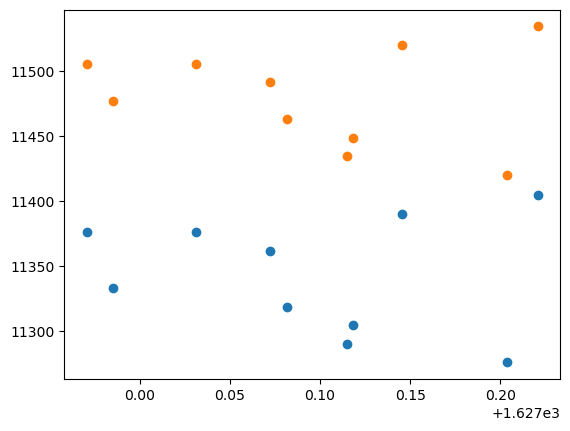

In [81]:
import matplotlib.pyplot as plt
height2 = [11375.656600, 11332.654844, 11375.656600, 11361.313716, 11318.341074, 11289.808214, 11304.034721, 11390.149063, 11275.594142, 11404.508273]
height4 = [11505.685698, 11477.042713, 11505.685698, 11491.285619, 11462.732448, 11434.189052, 11448.422312, 11520.000252, 11419.970692, 11534.411852]
distance = [1626.97070054, 1626.98553413, 1627.03109902, 1627.07208469, 1627.08159656, 1627.11519826, 1627.11807941, 1627.1452561, 1627.20336199, 1627.22056297]
plt.scatter(distance, height2)
plt.scatter(distance, height4)
plt.show()

In [82]:
print(distance43.ravel())
distance43_min = np.argsort(distance43.ravel())
print(distance43_min)
for i in distance43_min[:10]:
    print(distance43[i])
    print(time[i])

[  388.26408983   388.26000309   388.1444951  ... 59660.59982871
 59664.16912631 59667.71674179]
[  28858   28859   28857 ... 2311828 2311830 2311829]
[65.05635539]
2010-01-02T10:45:50.534000000
[66.54531361]
2010-01-02T10:45:54.733000000
[69.85406814]
2010-01-02T10:45:46.336000000
[69.99669977]
2010-01-02T10:45:58.931000000
[70.03269119]
2010-01-02T10:46:03.130000000
[73.60219948]
2010-01-02T10:45:37.939000000
[73.68779591]
2010-01-02T10:45:42.138000000
[73.93527577]
2010-01-02T10:46:07.328000000
[81.69779883]
2010-01-02T10:45:29.543000000
[81.71760734]
2010-01-02T10:45:21.146000000


ValueError: x and y must be the same size

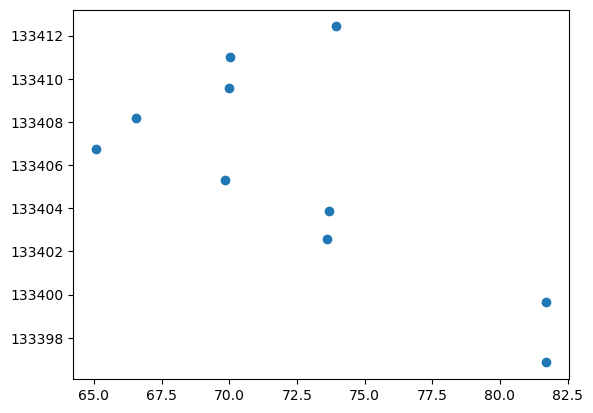

In [83]:
import matplotlib.pyplot as plt
height3 = [133406.758375, 133408.194537, 133405.313047, 133409.588748, 133410.993967, 133402.561974, 133403.883415, 133412.423865, 133399.648625, 133396.851294 ]
height4 = [ ]
distance = [65.05635539, 66.54531361, 69.85406814, 69.99669977, 70.03269119, 73.60219948, 73.68779591, 73.93527577, 81.69779883, 81.71760734]
plt.scatter(distance, height3)
plt.scatter(distance, height4)
plt.show()

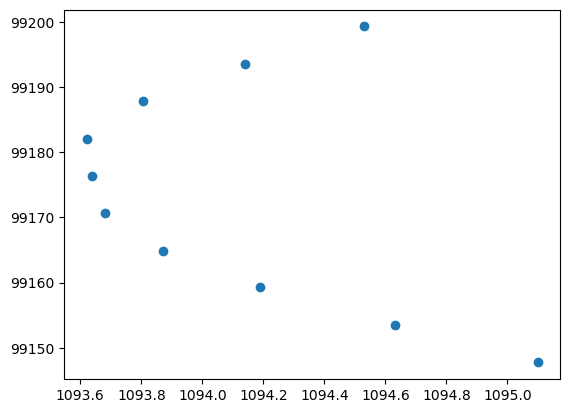

In [ ]:
import matplotlib.pyplot as plt

height1 = [99182.094280, 99176.389159, 99170.689476, 99187.861085, 99164.917766, 99193.568373, 99159.272192 , 99199.281839, 99153.498605, 99147.752121]
#height2 = [, ]
distance = [1093.62076137, 1093.63690694, 1093.68055508, 1093.8049385, 1093.87124742, 1094.13818062, 1094.18876414, 1094.52828176, 1094.63205919, 1095.09854979]

plt.scatter(distance, height1)
#plt.scatter(height2, distance)
plt.show()

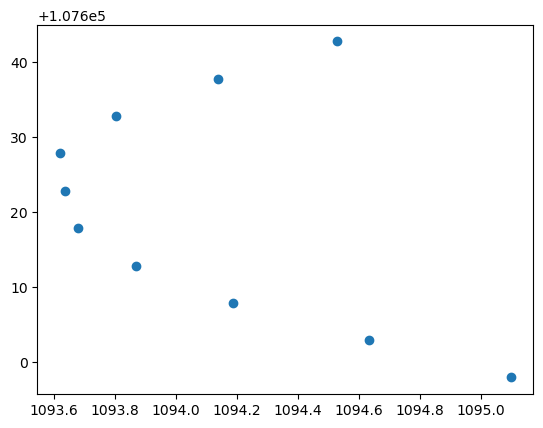

In [ ]:
import matplotlib.pyplot as plt

height2 = [107627.822434, 107622.770215, 107617.795219, 107632.797589, 107612.824681, 107637.771073, 107607.844020, 107642.747817, 107602.871014, 107597.894882]
distance = [1093.62076137, 1093.63690694, 1093.68055508, 1093.8049385, 1093.87124742, 1094.13818062, 1094.18876414, 1094.52828176, 1094.63205919, 1095.09854979]

plt.scatter(distance, height2)
plt.show()